In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot

### Toyota corolla

In [2]:
data = pd.read_csv('ToyotaCorolla.csv',encoding= 'unicode_escape')
data.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [3]:
data.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [4]:
data.rename({'Age_08_04':'Age','Quarterly_Tax': 'TaxQuaterly'},axis = 1 , inplace = True)

In [5]:
data.columns

Index(['Id', 'Model', 'Price', 'Age', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'TaxQuaterly', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age               1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  TaxQuaterly       1436 non-null   int64 
 17  Weight        

In [7]:
data
data1 = data[['Price','Age','KM','HP','cc','Doors','Gears','TaxQuaterly','Weight']]
data1

,Price,Age,KM,HP,cc,Doors,Gears,TaxQuaterly,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [8]:
data1.shape

(1436, 9)

In [9]:
data1.isna().sum()

Price          0
Age            0
KM             0
HP             0
cc             0
Doors          0
Gears          0
TaxQuaterly    0
Weight         0
dtype: int64

In [10]:
data1.corr()

,Price,Age,KM,HP,cc,Doors,Gears,TaxQuaterly,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
TaxQuaterly,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


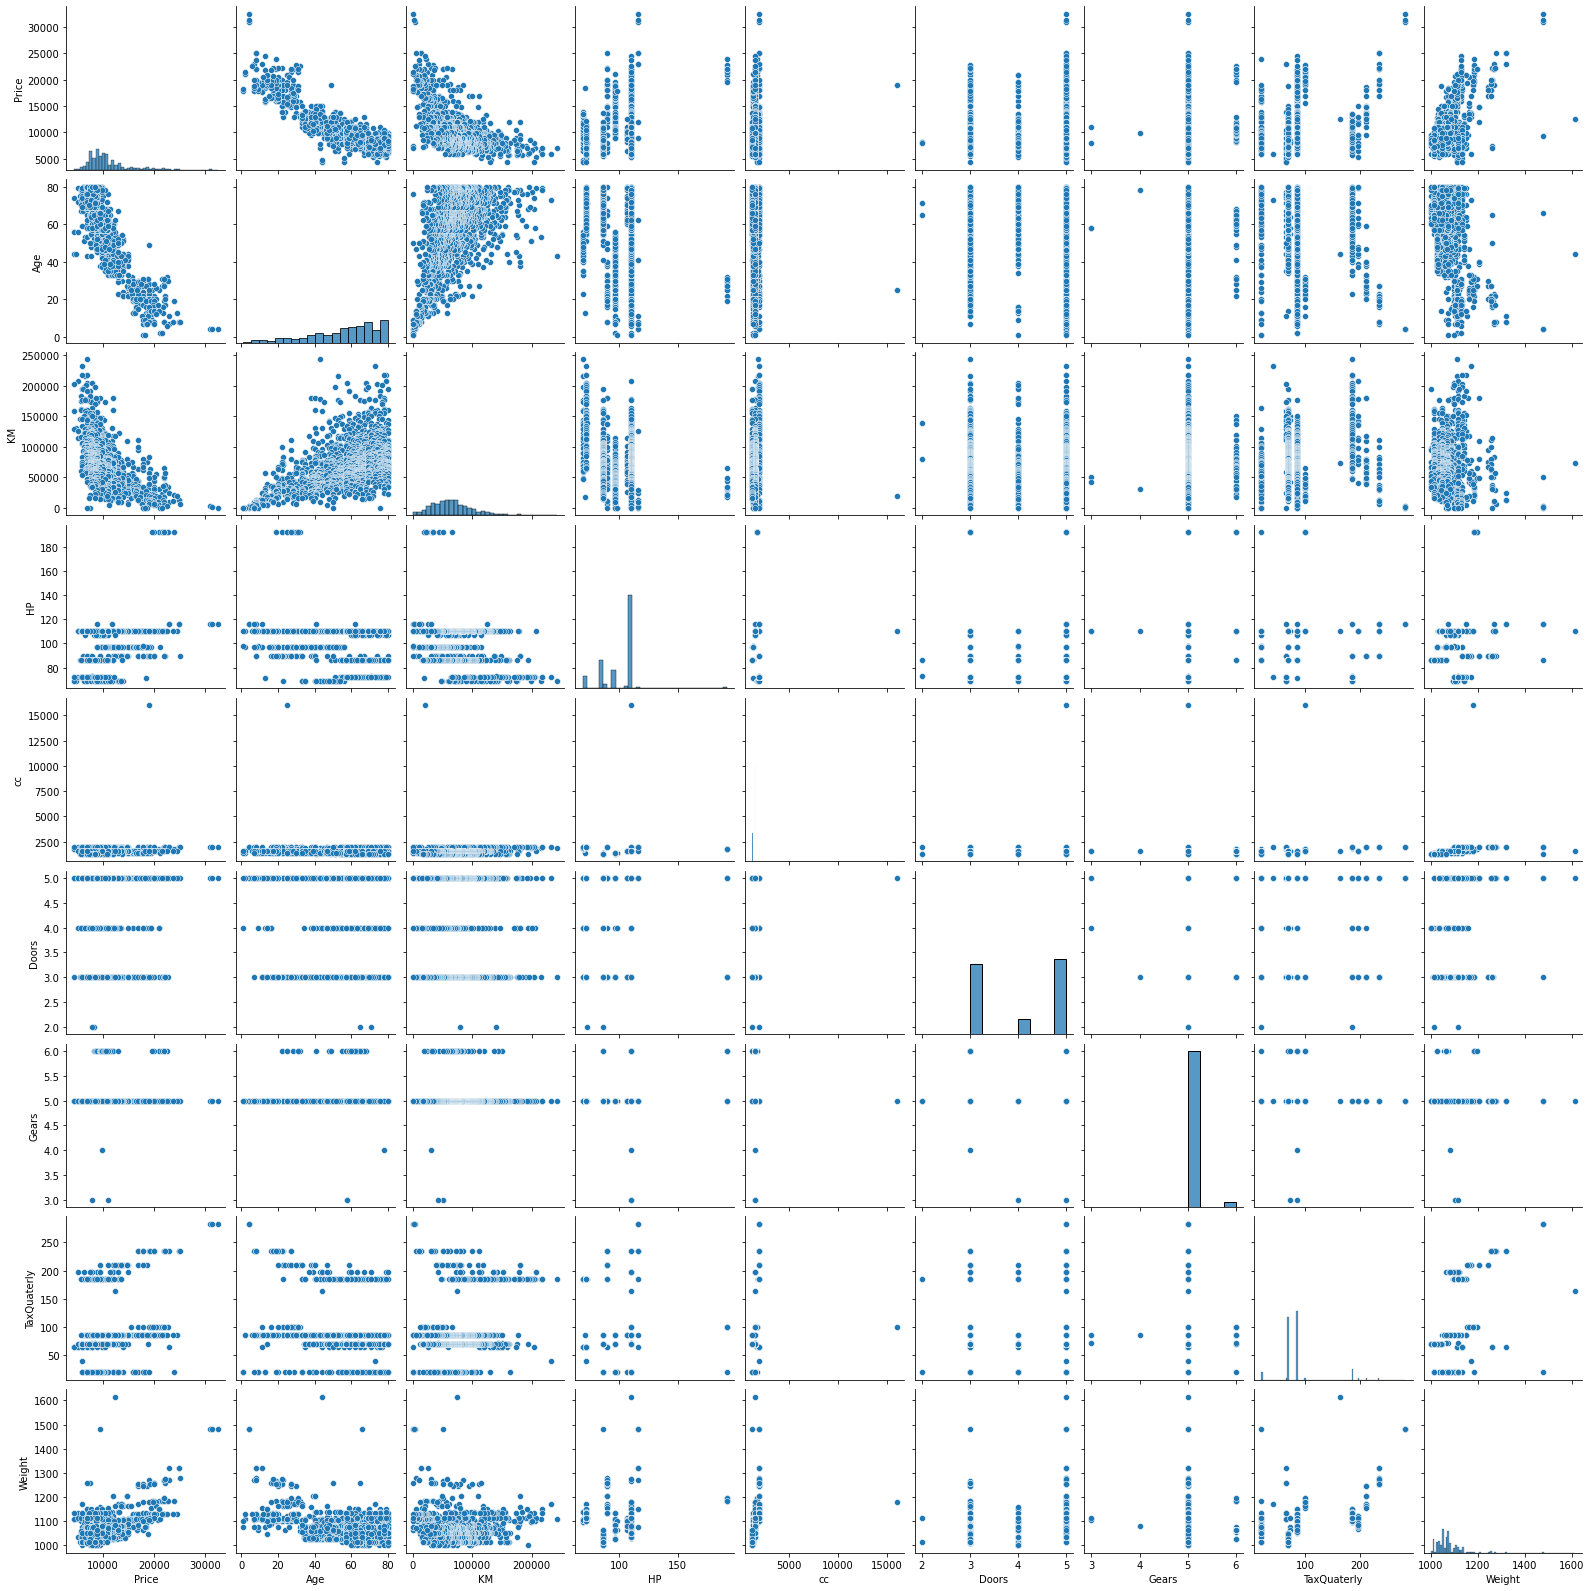

In [11]:
sns.pairplot(data1)

In [12]:
data1[data1.duplicated()]

,Price,Age,KM,HP,cc,Doors,Gears,TaxQuaterly,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [13]:
data1['Doors'].value_counts()

5    674
3    622
4    138
2      2
Name: Doors, dtype: int64

In [14]:
data1.groupby('Doors').mean('Price')

,Price,Age,KM,HP,cc,Gears,TaxQuaterly,Weight
Doors,,,,,,,,
2,8100.000000,68.000000,109572.500000,79.500000,1650.000000,5.000000,102.000000,1065.000000
3,10107.342444,58.448553,69233.400322,100.016077,1538.117363,5.064309,82.863344,1057.754019
4,9806.768116,60.210145,73886.601449,102.137681,1586.956522,4.985507,80.311594,1047.536232
5,11503.209199,52.729970,66669.272997,102.808605,1610.320475,5.000000,92.403561,1091.155786


In [15]:
data1=data1.drop_duplicates().reset_index(drop=True)
data1

,Price,Age,KM,HP,cc,Doors,Gears,TaxQuaterly,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [16]:
model = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+TaxQuaterly	+Weight', data=data).fit()

In [17]:
model.params

Intercept     -5573.106358
Age            -121.658402
KM               -0.020817
HP               31.680906
cc               -0.121100
Doors            -1.616641
Gears           594.319936
TaxQuaterly       3.949081
Weight           16.958632
dtype: float64

In [18]:
prediction = model.fittedvalues
prediction

0       16812.580505
1       16272.355186
2       16800.732460
3       16426.496731
4       16222.419010
            ...     
1431     8793.758297
1432     8291.338421
1433     8454.298007
1434     8578.038121
1435    10402.438333
Length: 1436, dtype: float64

In [19]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Wed, 19 Oct 2022   Prob (F-statistic):               0.00
Time:                        17:24:16   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age          -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM             -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP             31.6809      2.818     11.241      0.000      26.152      37.209
cc             -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors          -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears         594.3199    197.055      3.016      0.003     207.771     980.869
TaxQuaterly     3.9491      1.310      3.015      0.003       1.379       6.519
Weight         16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
model.pvalues

Intercept       8.241949e-05
Age            3.354724e-288
KM              7.538439e-57
HP              3.757218e-28
cc              1.790902e-01
Doors           9.677716e-01
Gears           2.606549e-03
TaxQuaterly     2.619148e-03
Weight          2.048576e-52
dtype: float64

##### From here we can see the pvalues of doors and cc is high so we will make individual models of it

In [21]:
model2 = smf.ols('Price~Doors',data = data).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     51.00
Date:                Wed, 19 Oct 2022   Prob (F-statistic):           1.46e-12
Time:                        17:24:16   Log-Likelihood:                -13782.
No. Observations:                1436   AIC:                         2.757e+04
Df Residuals:                    1434   BIC:                         2.758e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7885.0058    409.438     19.258      0.000    7081.843    8688.168
Doors        705.5586     98.795      7.142      0.000     511.761     899.356
==============================================================================
Omnibus:                      466.779   Durbin-Watson:                   0.287
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1406.209
Skew:                           1.651   Prob(JB):                    4.42e-306
Kurtosis:                       6.549   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
model2.pvalues , model2.tvalues

(Intercept    1.094732e-73
 Doors        1.461237e-12
 dtype: float64,
 Intercept    19.258097
 Doors         7.141657
 dtype: float64)

In [23]:
model3 = smf.ols('Price~cc',data=data).fit()

In [24]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     23.28
Date:                Wed, 19 Oct 2022   Prob (F-statistic):           1.55e-06
Time:                        17:24:16   Log-Likelihood:                -13795.
No. Observations:                1436   AIC:                         2.759e+04
Df Residuals:                    1434   BIC:                         2.760e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9027.5548    365.576     24.694      0.000    8310.435    9744.675
cc             1.0802      0.224      4.825      0.000       0.641       1.519
==============================================================================
Omnibus:                      465.181   Durbin-Watson:                   0.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1390.401
Skew:                           1.649   Prob(JB):                    1.20e-302
Kurtosis:                       6.516   Cond. No.                     6.29e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
model3.pvalues,model3.tvalues

(Intercept    1.766912e-112
 cc            1.550808e-06
 dtype: float64,
 Intercept    24.694090
 cc            4.824822
 dtype: float64)

In [26]:
model4 = smf.ols('Price~Doors+cc',data = data).fit()

In [27]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     35.24
Date:                Wed, 19 Oct 2022   Prob (F-statistic):           1.15e-15
Time:                        17:24:16   Log-Likelihood:                -13772.
No. Observations:                1436   AIC:                         2.755e+04
Df Residuals:                    1433   BIC:                         2.757e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6509.4211    515.773     12.621      0.000    5497.670    7521.173
Doors        671.3973     98.501      6.816      0.000     478.176     864.619
cc             0.9597      0.221      4.340      0.000       0.526       1.393
==============================================================================
Omnibus:                      448.845   Durbin-Watson:                   0.290
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1294.854
Skew:                           1.603   Prob(JB):                    6.70e-282
Kurtosis:                       6.370   Cond. No.                     9.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
model4.pvalues,model4.tvalues

(Intercept    1.056885e-34
 Doors        1.373469e-11
 cc           1.521992e-05
 dtype: float64,
 Intercept    12.620704
 Doors         6.816153
 cc            4.340400
 dtype: float64)

In [29]:
rsq_age=smf.ols('Age~KM+HP+cc+Doors+Gears+TaxQuaterly+Weight',data=data1).fit().rsquared
vif_age=1/(1-rsq_age)

rsq_KM=smf.ols('KM~Age+HP+cc+Doors+Gears+TaxQuaterly+Weight',data=data1).fit().rsquared
vif_KM=1/(1-rsq_KM)

rsq_HP=smf.ols('HP~Age+KM+cc+Doors+Gears+TaxQuaterly+Weight',data=data1).fit().rsquared
vif_HP=1/(1-rsq_HP)

rsq_CC=smf.ols('cc~Age+KM+HP+Doors+Gears+TaxQuaterly+Weight',data=data1).fit().rsquared
vif_CC=1/(1-rsq_CC)

rsq_DR=smf.ols('Doors~Age+KM+HP+cc+Gears+TaxQuaterly+Weight',data=data1).fit().rsquared
vif_DR=1/(1-rsq_DR)

rsq_GR=smf.ols('Gears~Age+KM+HP+cc+Doors+TaxQuaterly+Weight',data=data1).fit().rsquared
vif_GR=1/(1-rsq_GR)

rsq_QT=smf.ols('TaxQuaterly~Age+KM+HP+cc+Doors+Gears+Weight',data=data1).fit().rsquared
vif_QT=1/(1-rsq_QT)

rsq_WT=smf.ols('Weight~Age+KM+HP+cc+Doors+Gears+TaxQuaterly',data=data1).fit().rsquared
vif_WT=1/(1-rsq_WT)

# Putting the values in Dataframe format
d1={'Variables':['Age','KM','HP','cc','Doors','Gears','TaxQuaterly','Weight'],
    'Vif':[vif_age,vif_KM,vif_HP,vif_CC,vif_DR,vif_GR,vif_QT,vif_WT]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,Age,1.876236
1,KM,1.757178
2,HP,1.419180
3,cc,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,TaxQuaterly,2.295375
7,Weight,2.487180


##### As all the VIF values are low so we will keep it 

##### Residual Analysis

In [30]:
resid = model.resid
resid

0      -3312.580505
1      -2522.355186
2      -2850.732460
3      -1476.496731
4      -2472.419010
           ...     
1431   -1293.758297
1432    2553.661579
1433      45.701993
1434   -1328.038121
1435   -3452.438333
Length: 1436, dtype: float64

C:\Users\priya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

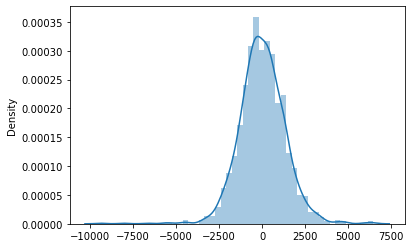

In [31]:
sns.distplot(resid)

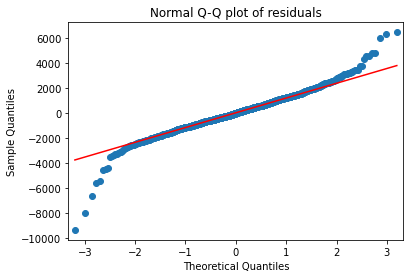

In [32]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid, line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [33]:
def standardize(value):
 return (value - value.mean())/value.std()

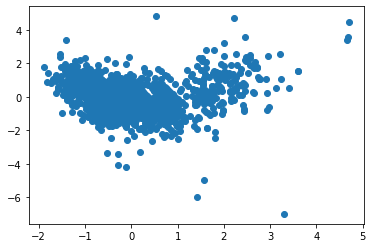

In [34]:
plt.scatter(standardize(prediction),standardize(resid))

In [35]:
data1.columns

Index(['Price', 'Age', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'TaxQuaterly',
       'Weight'],
      dtype='object')

eval_env: 1


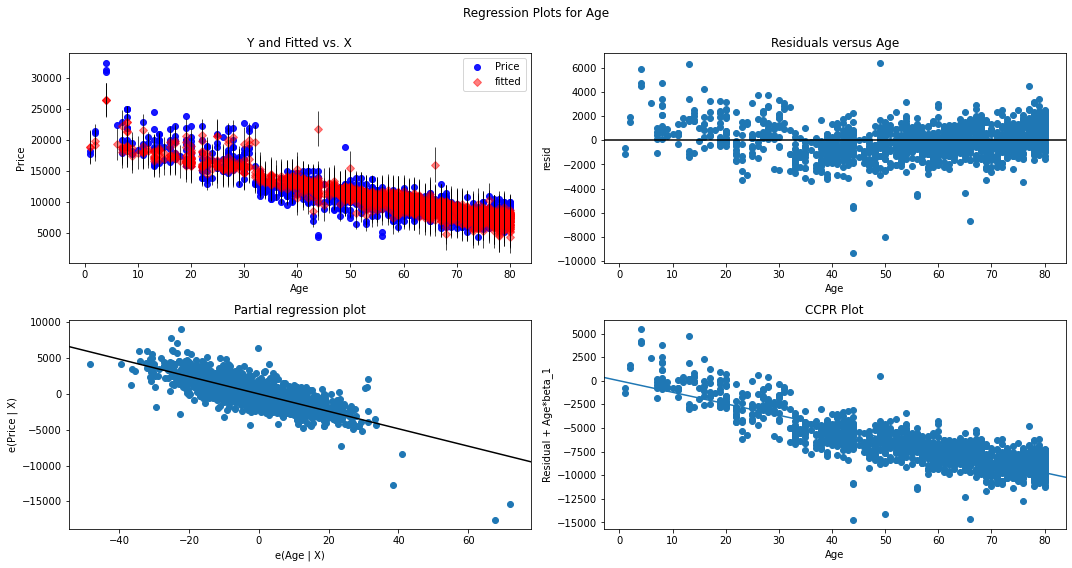

In [36]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,'Age',fig=fig)

eval_env: 1


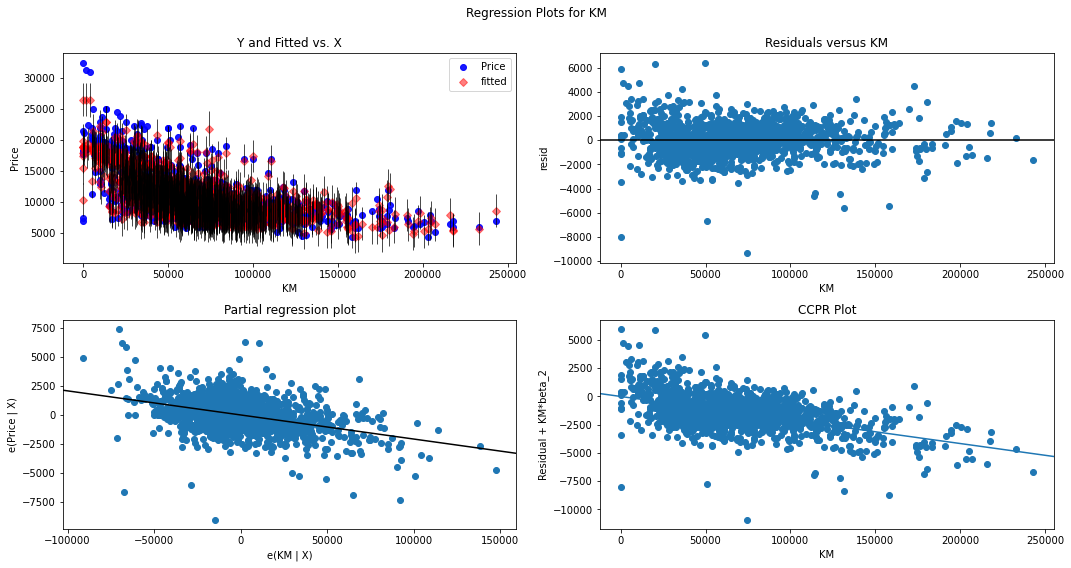

In [37]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,'KM',fig=fig)

eval_env: 1


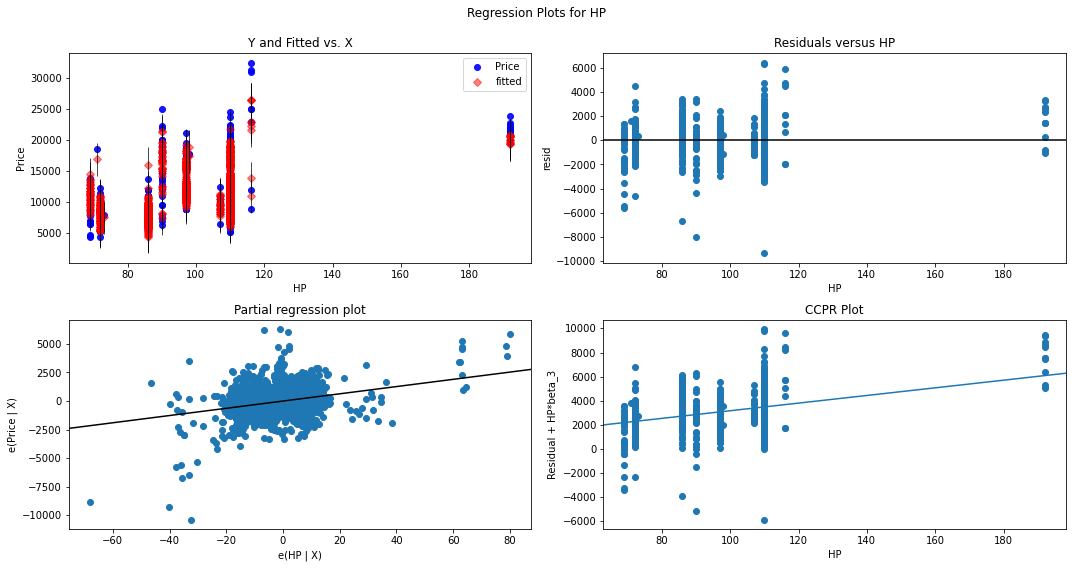

In [38]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,'HP',fig=fig)

eval_env: 1


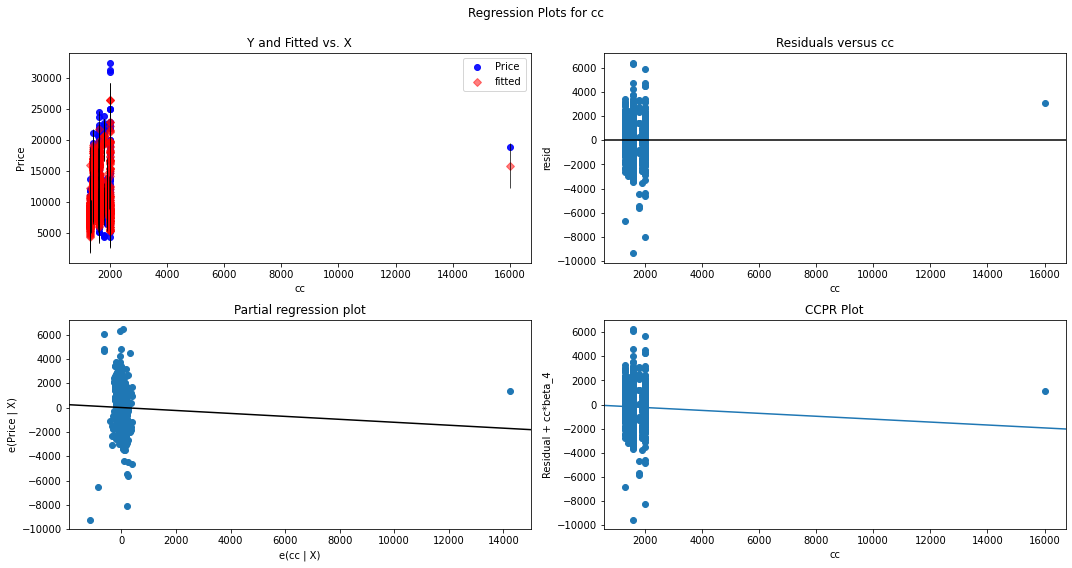

In [39]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,'cc',fig=fig)

eval_env: 1


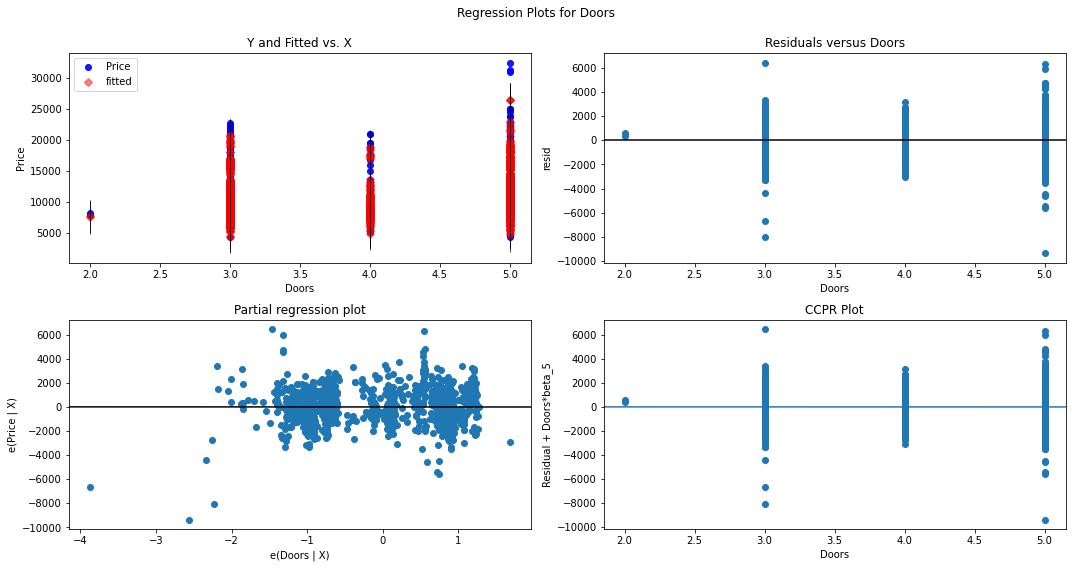

In [40]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,'Doors',fig=fig)

eval_env: 1


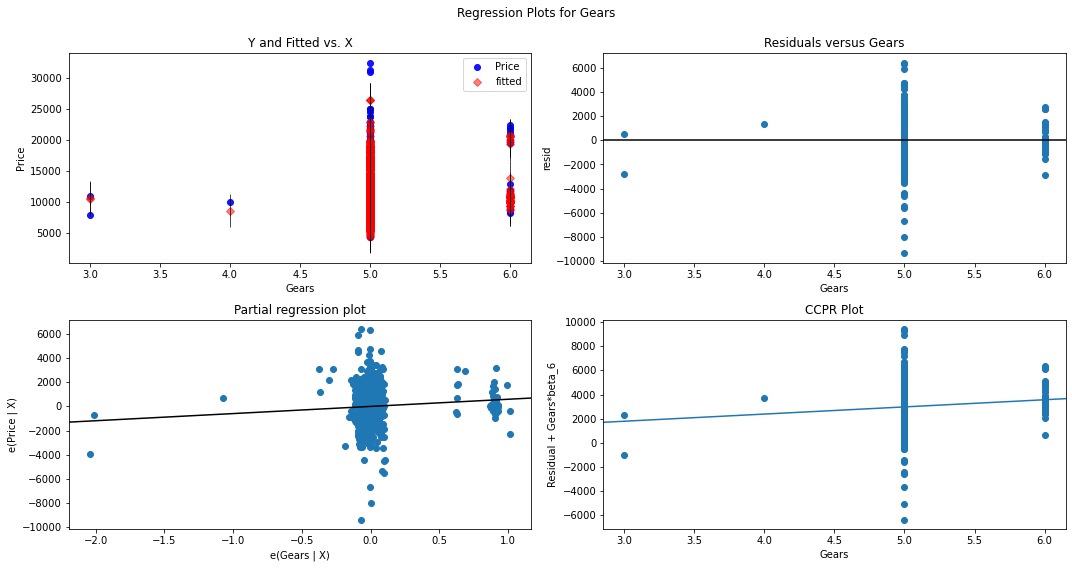

In [41]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,'Gears',fig=fig)

eval_env: 1


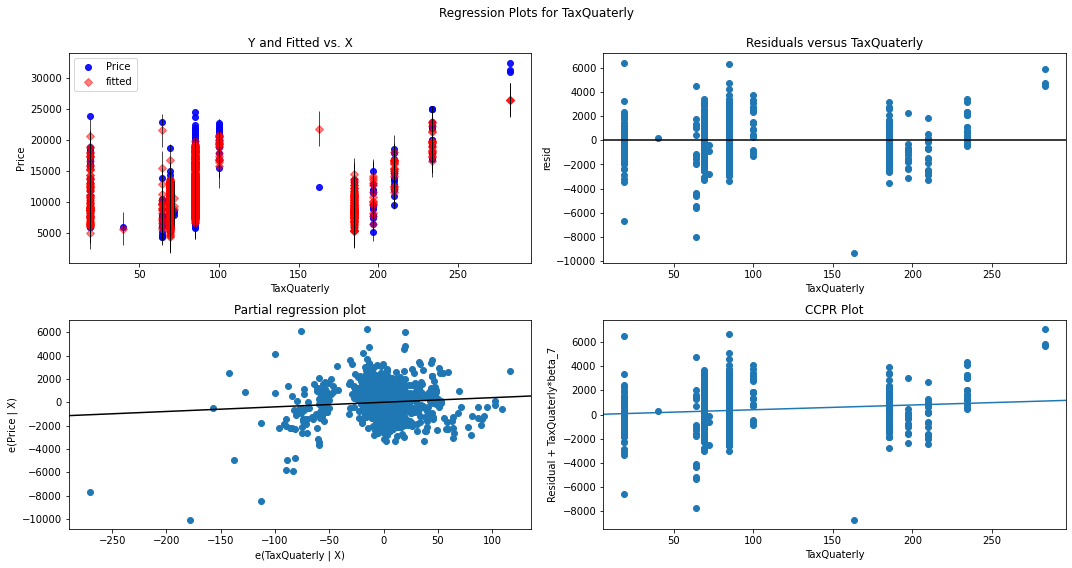

In [42]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,'TaxQuaterly',fig=fig)

eval_env: 1


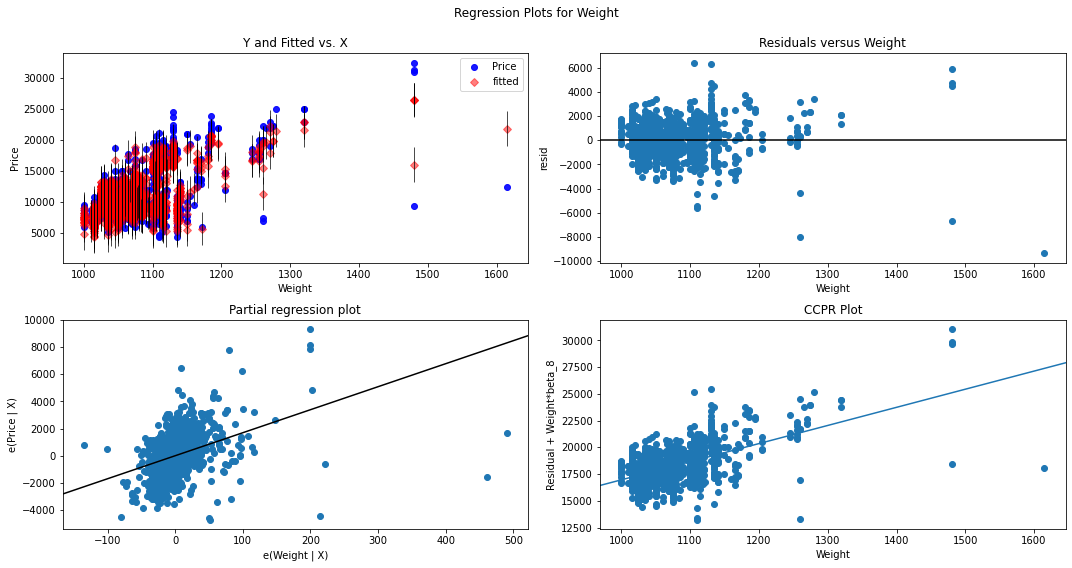

In [43]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,'Weight',fig=fig)

In [44]:
model_inf = model.get_influence()
(c, _) = model_inf.cooks_distance
c

array([7.23682667e-03, 3.96793393e-03, 5.46476784e-03, ...,
       8.44762355e-07, 6.97878368e-04, 1.08627724e-02])

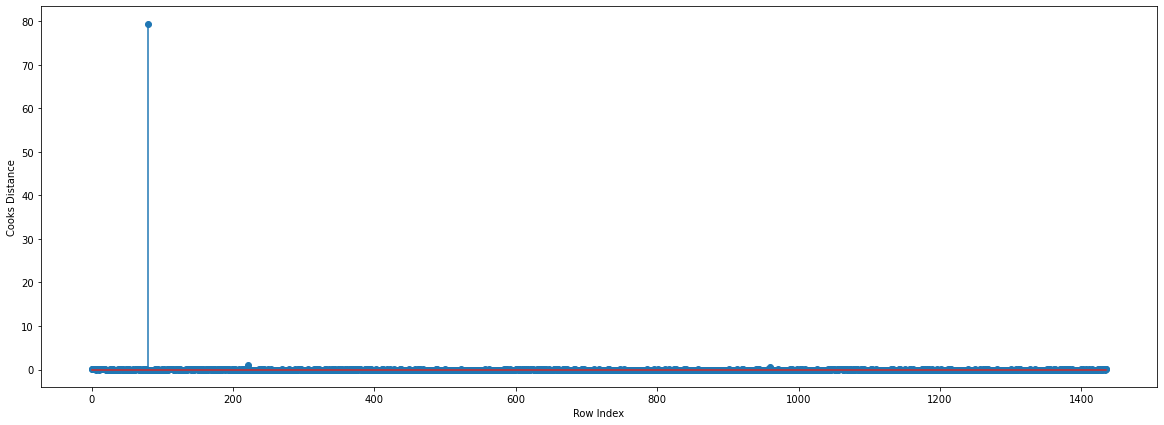

In [45]:
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(data1)+1),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [46]:
np.max(c),np.argmax(c)

(79.52010624138181, 80)

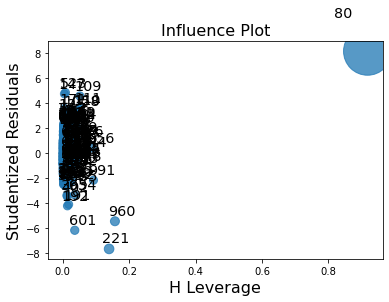

<Figure size 1440x720 with 0 Axes>

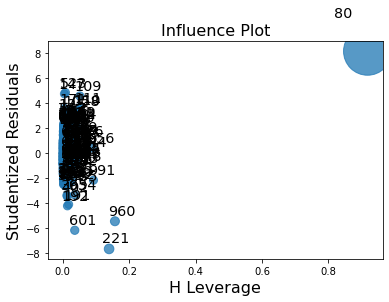

In [47]:
from statsmodels.graphics.regressionplots import influence_plot
plt.figure(figsize=(20,10))
influence_plot(model)

In [48]:
data1[data1.index.isin([80])]

,Price,Age,KM,HP,cc,Doors,Gears,TaxQuaterly,Weight
80,18950,25,20019,110,16000,5,5,100,1180


In [49]:
data2 = data1.drop(data1.index[[80]],axis=0).reset_index().drop(['index'],axis=1)
data2.head()

,Price,Age,KM,HP,cc,Doors,Gears,TaxQuaterly,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [50]:
for c in [np.max(c)>1]:
        model=smf.ols('Price~Age+KM+HP+cc+Doors+Gears+TaxQuaterly+Weight',data=data2).fit()
        (c,_)=model.get_influence().cooks_distance
        c
        np.argmax(c) , np.max(c)
        data2=data2.drop(data2.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        data2
data2

,Price,Age,KM,HP,cc,Doors,Gears,TaxQuaterly,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1428,7500,69,20544,86,1300,3,5,69,1025
1429,10845,72,19000,86,1300,3,5,69,1015
1430,8500,71,17016,86,1300,3,5,69,1015
1431,7250,70,16916,86,1300,3,5,69,1015


In [51]:
final_model = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+TaxQuaterly	+Weight',data = data2).fit()

In [52]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     1264.
Date:                Wed, 19 Oct 2022   Prob (F-statistic):               0.00
Time:                        17:24:29   Log-Likelihood:                -12270.
No. Observations:                1433   AIC:                         2.456e+04
Df Residuals:                    1424   BIC:                         2.461e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.018e+04   1398.103     -7.279      0.000   -1.29e+04   -7433.579
Age          -116.6301      2.509    -46.483      0.000    -121.552    -111.708
KM             -0.0172      0.001    -13.935      0.000      -0.020      -0.015
HP             39.2081      2.818     13.916      0.000      33.681      44.735
cc             -3.1922      0.305    -10.455      0.000      -3.791      -2.593
Doors         -64.7218     38.159     -1.696      0.090    -139.577      10.133
Gears         487.4310    186.626      2.612      0.009     121.340     853.522
TaxQuaterly     7.8987      1.384      5.706      0.000       5.183      10.614
Weight         24.9584      1.189     20.983      0.000      22.625      27.292
==============================================================================
Omnibus:                      195.629   Durbin-Watson:                   1.639
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1736.249
Skew:                          -0.308   Prob(JB):                         0.00
Kurtosis:                       8.357   Cond. No.                     3.27e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.27e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
final_model.fittedvalues

0       16453.715678
1       16006.217709
2       16428.047478
3       16086.340059
4       15908.429428
            ...     
1428     9014.516216
1429     8441.666463
1430     8592.508558
1431     8710.863036
1432    10232.595430
Length: 1433, dtype: float64

In [54]:
prediction = final_model.predict(data2)
prediction

0       16453.715678
1       16006.217709
2       16428.047478
3       16086.340059
4       15908.429428
            ...     
1428     9014.516216
1429     8441.666463
1430     8592.508558
1431     8710.863036
1432    10232.595430
Length: 1433, dtype: float64

In [55]:
data2['Prediction'] = prediction
data2

,Price,Age,KM,HP,cc,Doors,Gears,TaxQuaterly,Weight,Prediction
0,13500,23,46986,90,2000,3,5,210,1165,16453.715678
1,13750,23,72937,90,2000,3,5,210,1165,16006.217709
2,13950,24,41711,90,2000,3,5,210,1165,16428.047478
3,14950,26,48000,90,2000,3,5,210,1165,16086.340059
4,13750,30,38500,90,2000,3,5,210,1170,15908.429428
...,...,...,...,...,...,...,...,...,...,...
1428,7500,69,20544,86,1300,3,5,69,1025,9014.516216
1429,10845,72,19000,86,1300,3,5,69,1015,8441.666463
1430,8500,71,17016,86,1300,3,5,69,1015,8592.508558
1431,7250,70,16916,86,1300,3,5,69,1015,8710.863036


### Start up

In [94]:
data = pd.read_csv('50_Startups.csv')
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [96]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [97]:
data.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


<AxesSubplot:>

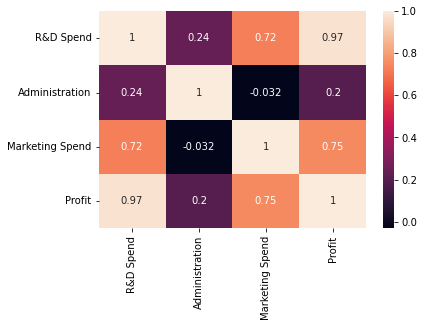

In [98]:
sns.heatmap(data.corr(),annot = True)

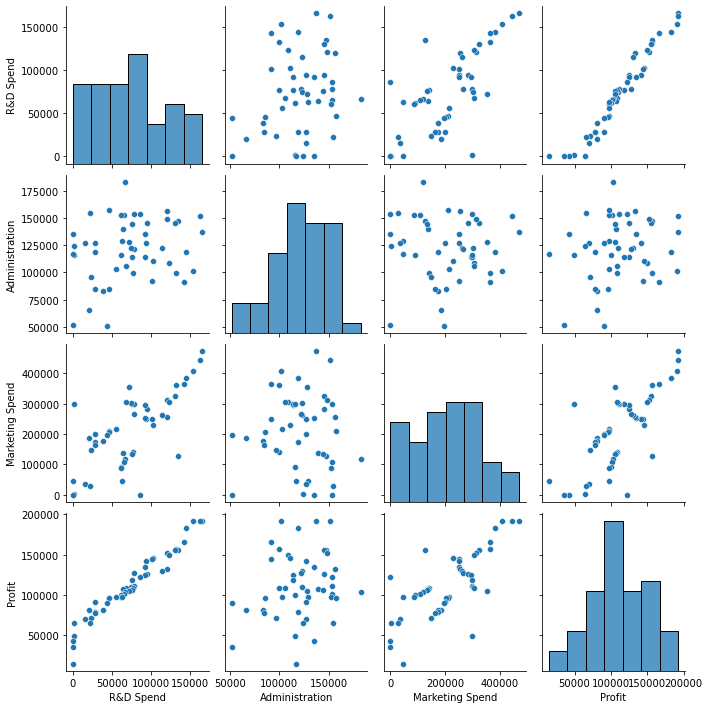

In [99]:
sns.pairplot(data)

In [100]:
data=data.drop_duplicates().reset_index(drop=True)
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [101]:
data.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [102]:
data['RD'] = data['R&D Spend']
data.drop(['R&D Spend'],axis = 1,inplace =True)
data

,Administration,Marketing Spend,State,Profit,RD
0,136897.80,471784.10,New York,192261.83,165349.20
1,151377.59,443898.53,California,191792.06,162597.70
2,101145.55,407934.54,Florida,191050.39,153441.51
3,118671.85,383199.62,New York,182901.99,144372.41
4,91391.77,366168.42,Florida,166187.94,142107.34
5,99814.71,362861.36,New York,156991.12,131876.90
6,147198.87,127716.82,California,156122.51,134615.46
7,145530.06,323876.68,Florida,155752.60,130298.13
8,148718.95,311613.29,New York,152211.77,120542.52
9,108679.17,304981.62,California,149759.96,123334.88


In [103]:
data['Marketing'] = data['Marketing Spend']
data.drop(['Marketing Spend'],axis = 1,inplace =True)
data

,Administration,State,Profit,RD,Marketing
0,136897.80,New York,192261.83,165349.20,471784.10
1,151377.59,California,191792.06,162597.70,443898.53
2,101145.55,Florida,191050.39,153441.51,407934.54
3,118671.85,New York,182901.99,144372.41,383199.62
4,91391.77,Florida,166187.94,142107.34,366168.42
5,99814.71,New York,156991.12,131876.90,362861.36
6,147198.87,California,156122.51,134615.46,127716.82
7,145530.06,Florida,155752.60,130298.13,323876.68
8,148718.95,New York,152211.77,120542.52,311613.29
9,108679.17,California,149759.96,123334.88,304981.62


In [104]:
data.columns

Index(['Administration', 'State', 'Profit', 'RD', 'Marketing'], dtype='object')

In [124]:
model1 = smf.ols('Profit~RD+Marketing+Administration', data=data).fit()

In [125]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Wed, 19 Oct 2022   Prob (F-statistic):              0.162
Time:                        18:45:45   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
Administration     0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [126]:
model.pvalues

Intercept         0.003824
Administration    0.162217
dtype: float64

In [127]:
model = smf.ols('Profit~Administration',data=data).fit()

In [128]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Wed, 19 Oct 2022   Prob (F-statistic):              0.162
Time:                        18:45:47   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
Administration     0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [129]:
model.pvalues

Intercept         0.003824
Administration    0.162217
dtype: float64

In [130]:
rsq_r=smf.ols("RD~Administration+Marketing",data=data).fit().rsquared
vif_r=1/(1-rsq_r)

rsq_a=smf.ols("Administration~RD+Marketing",data=data).fit().rsquared
vif_a=1/(1-rsq_a)

rsq_m=smf.ols("Marketing~RD+Administration",data=data).fit().rsquared
vif_m=1/(1-rsq_m)

# Putting the values in Dataframe format
start={'Variables':['RD','Aadministration','Marketing'],'Vif':[vif_r,vif_a,vif_m]}
Vif_df=pd.DataFrame(start)
Vif_df

,Variables,Vif
0,RD,2.468903
1,Aadministration,1.175091
2,Marketing,2.326773


In [131]:
res=model1.resid
res

0      -259.422890
1      2635.291768
2      8903.110904
3      9205.289974
4     -5951.574183
5     -6589.660571
6     -1991.586669
7     -4268.763048
8       470.070301
9     -5124.724110
10    10612.933633
11     8685.687039
12    12447.465818
13     6819.358337
14   -16945.996335
15   -16318.119985
16    10077.524599
17    -4822.077208
18    -4747.326806
19     7141.643633
20     1834.360769
21    -6006.431640
22    -4354.731717
23    -1262.625221
24    -4810.926113
25     5166.614935
26    -4867.035350
27    -9399.761457
28     1622.353995
29     -790.343452
30      485.217064
31     -204.296276
32    -1573.488985
33    -1136.087805
34     7673.526259
35     5967.910432
36    15422.015415
37      329.602292
38    11531.629352
39    -2723.251977
40     3423.956009
41     2996.273761
42      878.078179
43     9591.940037
44      588.975084
45    17275.430313
46    -6675.456853
47    -3930.858983
48   -13497.978158
49   -33533.734111
dtype: float64

In [132]:
res.mean()

2.648448571562767e-11

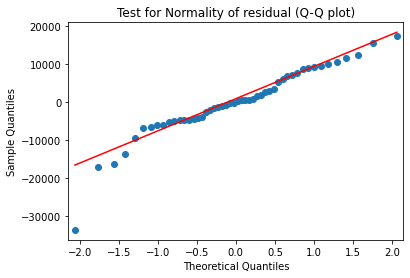

In [134]:
qqplot=sm.qqplot(res,line='q')
plt.title("Test for Normality of residual (Q-Q plot)")
plt.show()

#### Residual plot of Homosdescaticity

In [135]:
def get_standardized_values(vals):
    return (vals-vals.mean())/vals.std()

<function matplotlib.pyplot.show(close=None, block=None)>

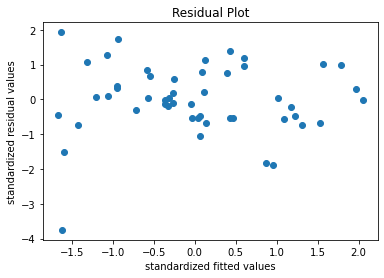

In [136]:
plt.scatter(get_standardized_values(model1.fittedvalues),get_standardized_values(model1.resid))
plt.title("Residual Plot")
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show

eval_env: 1


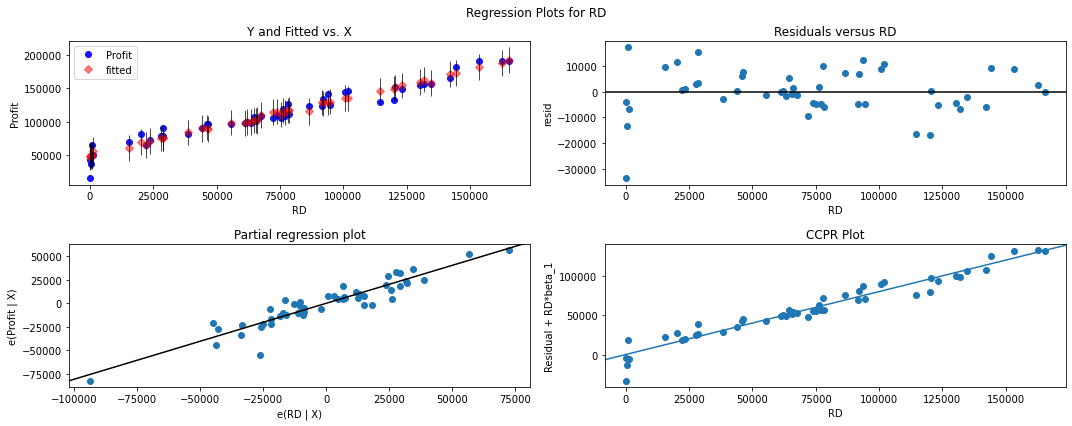

In [138]:
fig=plt.figure(figsize=(15,6))
fig=sm.graphics.plot_regress_exog(model1, "RD",fig=fig)
plt.show()

eval_env: 1


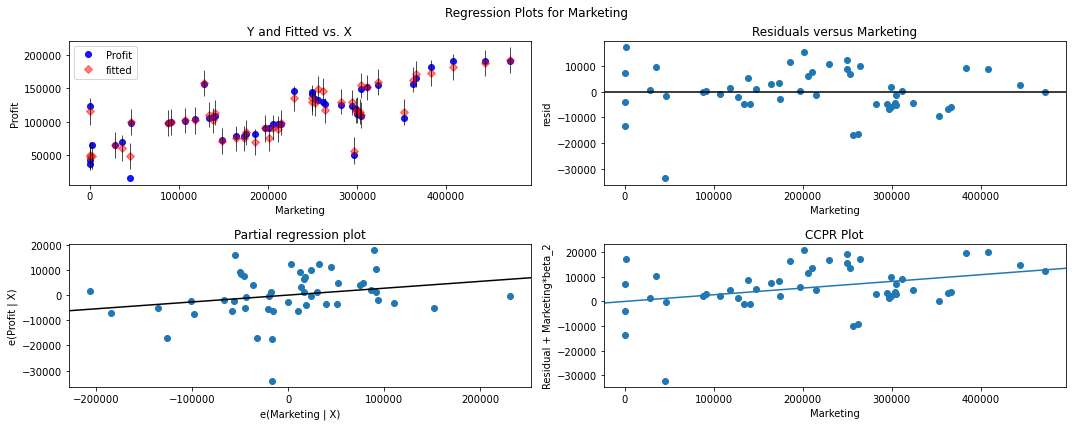

In [140]:
fig=plt.figure(figsize=(15,6))
fig=sm.graphics.plot_regress_exog(model1, "Marketing",fig=fig)
plt.show()

eval_env: 1


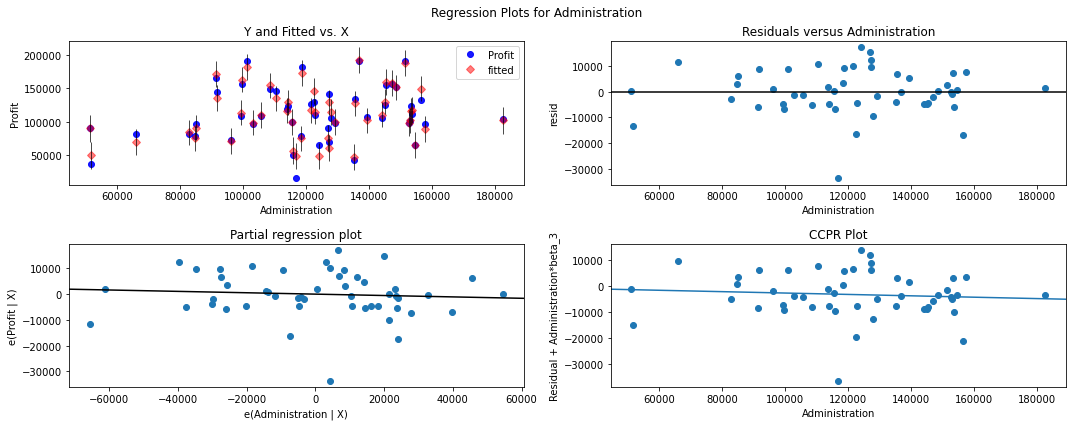

In [141]:
fig=plt.figure(figsize=(15,6))
fig=sm.graphics.plot_regress_exog(model1, "Administration",fig=fig)
plt.show()

In [142]:
model_influnece=model1.get_influence()
(c,_)=model_influnece.cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

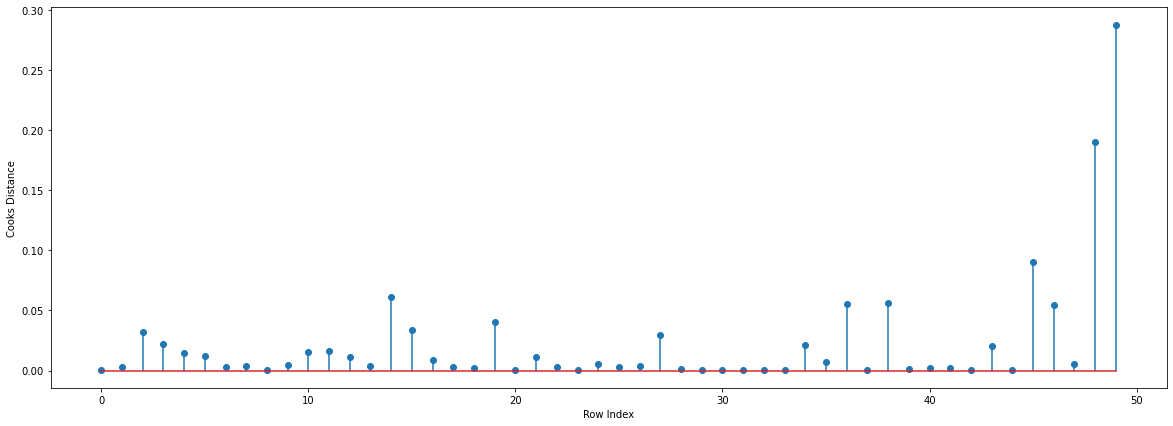

In [144]:
fig=plt.figure(figsize=(20,7))
#plt.stem(np.arange(len(start)),np.round(c,5))
plt.stem(np.arange(len(data)),np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [145]:
np.argmax(c),np.max(c)

(49, 0.2880822927543268)

In [147]:
data[data.index.isin([48,49])]

,Administration,State,Profit,RD,Marketing
48,51743.15,New York,35673.41,542.05,0.00
49,116983.80,California,14681.40,0.00,45173.06


In [148]:
data_new=data.drop(data.index[[48,49]],axis=0).reset_index()
data_new.head()

,index,Administration,State,Profit,RD,Marketing
0,0,136897.80,New York,192261.83,165349.20,471784.10
1,1,151377.59,California,191792.06,162597.70,443898.53
2,2,101145.55,Florida,191050.39,153441.51,407934.54
3,3,118671.85,New York,182901.99,144372.41,383199.62
4,4,91391.77,Florida,166187.94,142107.34,366168.42


In [149]:
final_model=smf.ols('Profit~RD+Administration+Marketing',data=data).fit()
final_model

In [150]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Wed, 19 Oct 2022   Prob (F-statistic):           4.53e-30
Time:                        18:51:53   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RD                 0.8057      0.045     17.846      0.000       0.715       0.897
Administration    -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing          0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [153]:
test=pd.DataFrame({'RD':75000,"Administration":90000,"Marketing":150000},index=[0])
test

,RD,Administration,Marketing
0,75000,90000,150000


In [154]:
final_model.predict(test)

0    112221.594298
dtype: float64

In [155]:
Predictions=final_model.predict(data)
Predictions

0     192521.252890
1     189156.768232
2     182147.279096
3     173696.700026
4     172139.514183
5     163580.780571
6     158114.096669
7     160021.363048
8     151741.699699
9     154884.684110
10    135509.016367
11    135573.712961
12    129138.054182
13    127487.991663
14    149548.646335
15    146235.159985
16    116915.405401
17    130192.447208
18    129014.226806
19    115635.216367
20    116639.669231
21    117319.451640
22    114706.981717
23    109996.615221
24    113362.966113
25    102237.725065
26    110600.575350
27    114408.071457
28    101660.026005
29    101794.983452
30     99452.372936
31     97687.856276
32     99001.328985
33     97915.007805
34     89039.273741
35     90511.599568
36     75286.174585
37     89619.537708
38     69697.430648
39     83729.011977
40     74815.953991
41     74802.556239
42     70620.411821
43     60167.039963
44     64611.354916
45     47650.649687
46     56166.206853
47     46490.588983
48     49171.388158
49     48215.134111


In [156]:
data["Predictions"]=Predictions
data

,Administration,State,Profit,RD,Marketing,Predictions
0,136897.80,New York,192261.83,165349.20,471784.10,192521.252890
1,151377.59,California,191792.06,162597.70,443898.53,189156.768232
2,101145.55,Florida,191050.39,153441.51,407934.54,182147.279096
3,118671.85,New York,182901.99,144372.41,383199.62,173696.700026
4,91391.77,Florida,166187.94,142107.34,366168.42,172139.514183
5,99814.71,New York,156991.12,131876.90,362861.36,163580.780571
6,147198.87,California,156122.51,134615.46,127716.82,158114.096669
7,145530.06,Florida,155752.60,130298.13,323876.68,160021.363048
8,148718.95,New York,152211.77,120542.52,311613.29,151741.699699
9,108679.17,California,149759.96,123334.88,304981.62,154884.684110
